## Analyzing Tobacco Use in the United States

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importing the dataset
tobacco = pd.read_csv('C:\\Users\\RAHUL\\Downloads\\Tobacco_Use__2011_to_2023.csv')

In [3]:
# Displaying first five rows
tobacco.head()

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2017,GU,Guam,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,NaN,%,Percentage,...,"(13.444304, 144.793731)",BEH,100BEH,110CSA,2GEN,8AGE,6RAC,6EDU,BRF21,21
1,2018,US,National Median (States and DC),Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Current,%,Percentage,...,NaN,BEH,100BEH,165SSA,1GEN,8AGE,6RAC,6EDU,BRF27,27
2,2017,US,National Median (States and DC),Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Never,%,Percentage,...,NaN,BEH,100BEH,165SSA,1GEN,8AGE,6RAC,6EDU,BRF28,28
3,2016,GU,Guam,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,NaN,%,Percentage,...,"(13.444304, 144.793731)",BEH,150BEH,177SCU,1GEN,8AGE,4RAC,6EDU,BRF69,69
4,2014,GU,Guam,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,NaN,%,Percentage,...,"(13.444304, 144.793731)",BEH,100BEH,110CSA,1GEN,8AGE,5RAC,6EDU,BRF22,22


In [4]:
tobacco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43341 entries, 0 to 43340
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YEAR                        43341 non-null  object 
 1   LocationAbbr                43341 non-null  object 
 2   LocationDesc                43341 non-null  object 
 3   TopicType                   43341 non-null  object 
 4   TopicDesc                   43341 non-null  object 
 5   MeasureDesc                 43341 non-null  object 
 6   DataSource                  43341 non-null  object 
 7   Response                    15018 non-null  object 
 8   Data_Value_Unit             43341 non-null  object 
 9   Data_Value_Type             43341 non-null  object 
 10  Data_Value                  41224 non-null  float64
 11  Data_Value_Footnote_Symbol  2117 non-null   object 
 12  Data_Value_Footnote         2117 non-null   object 
 13  Data_Value_Std_Err          411

## Data Visualization

##### Research Question 1: Distribution of smokers by demographics

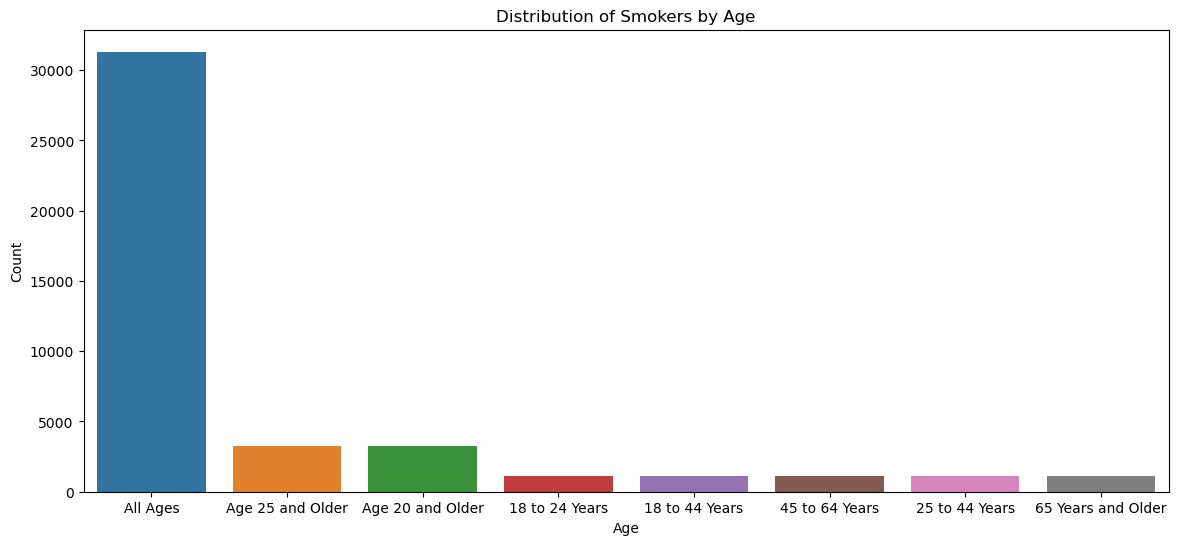

In [5]:
# Distribution of smokers by demographics
plt.figure(figsize=(14, 6))
sns.countplot(x='Age', data=tobacco)
plt.title('Distribution of Smokers by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


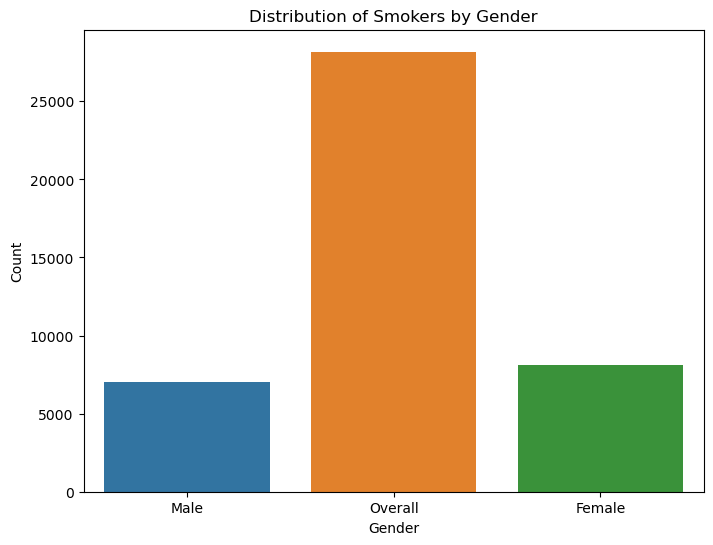

In [6]:
# Distribution of smokers by Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=tobacco)
plt.title('Distribution of Smokers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

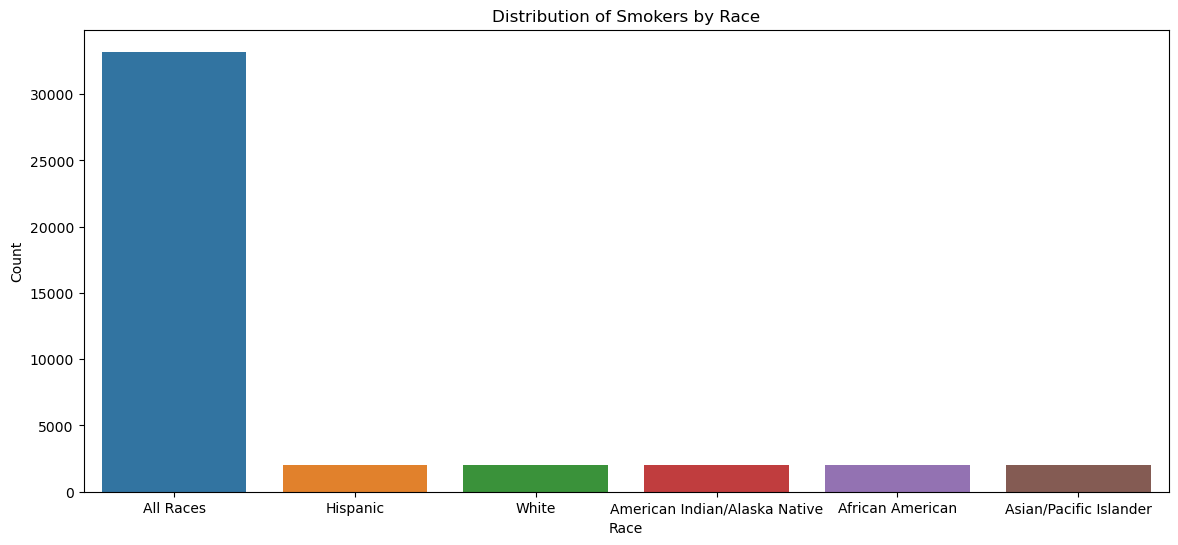

In [7]:
# Distribution of smokers by Race 
plt.figure(figsize=(14, 6))
sns.countplot(x='Race', data=tobacco)
plt.title('Distribution of Smokers by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

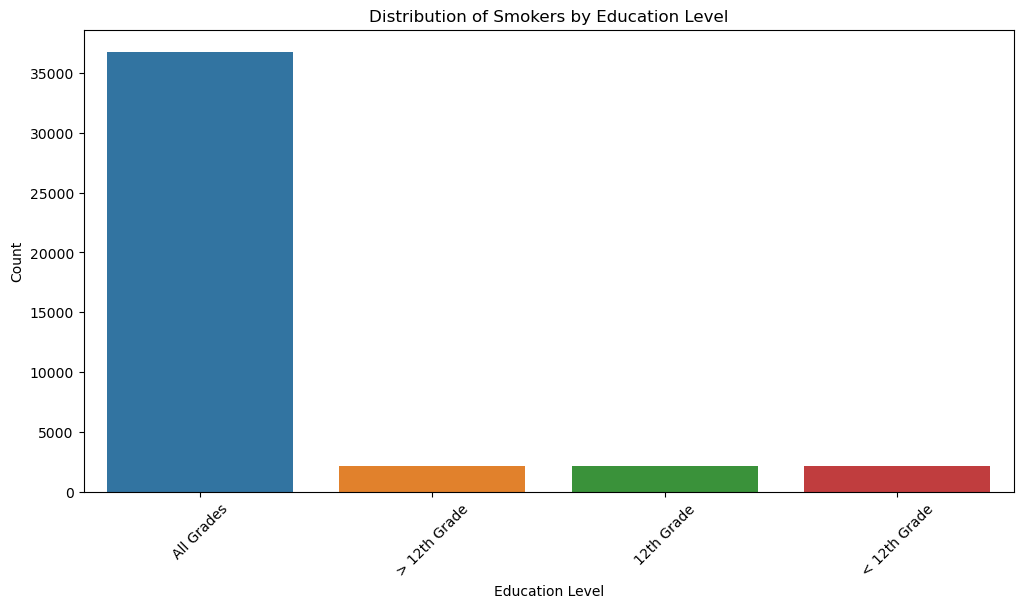

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Education', data=tobacco)
plt.title('Distribution of Smokers by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


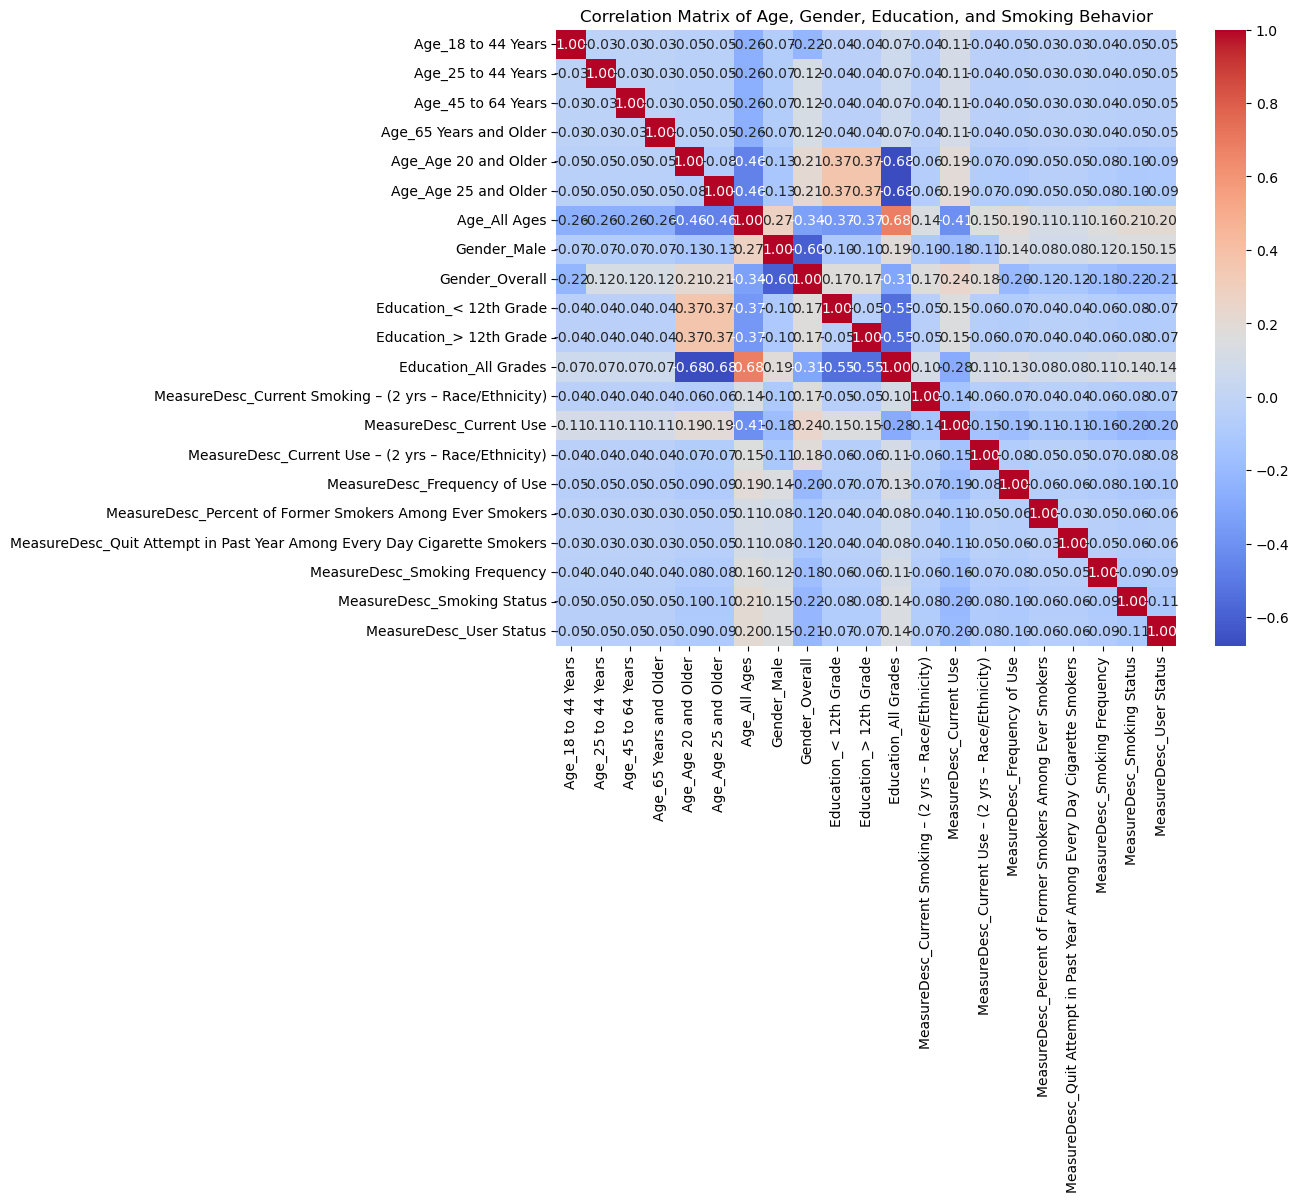

In [9]:
# Subsetting the dataset to include only necessary columns
subset_data = tobacco[['Age', 'Gender', 'Education', 'MeasureDesc']]

# Dropping rows with missing values
subset_data = subset_data.dropna()

# Perform one-hot encoding for categorical variables
subset_data = pd.get_dummies(subset_data, columns=['Age', 'Gender', 'Education', 'MeasureDesc'], drop_first=True)

# Calculating correlations between variables
correlation_matrix = subset_data.corr()

# Visualizing correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Age, Gender, Education, and Smoking Behavior')
plt.show()

### Research Question 2: Frequency of smoking among different demographic groups

#### Frequency of smoking of all the participants

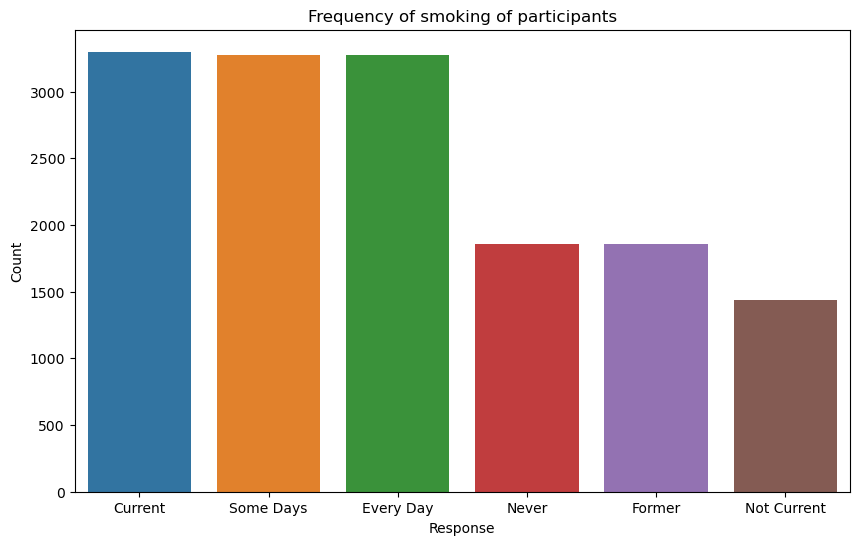

In [10]:
# Counting the frequency of smoking among participants 
response_counts = tobacco['Response'].value_counts()

# Plotting the count of unique values
plt.figure(figsize=(10, 6))
sns.countplot(x='Response', data=tobacco, order=response_counts.index)
plt.title('Frequency of smoking of participants')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()


#### Frequency of Smoking by Gender

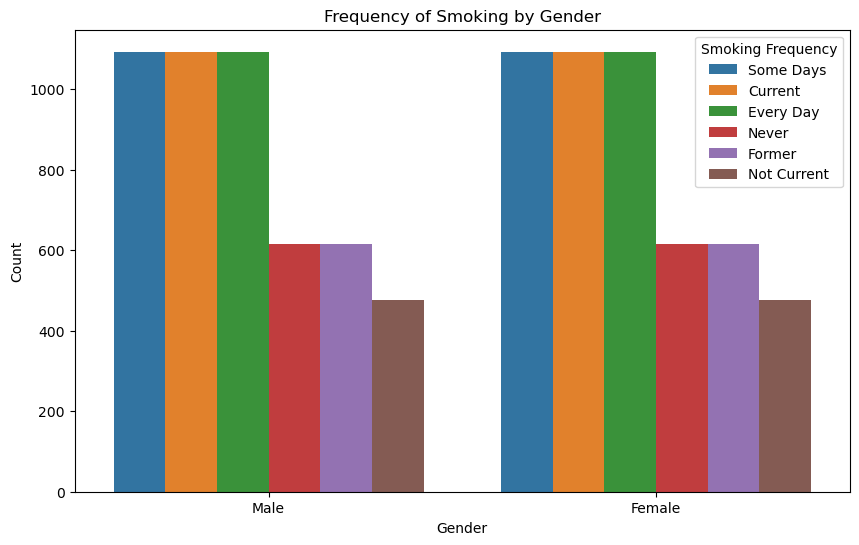

In [11]:
# Filtering 'Overall' from Gender
filtered_Gender = tobacco[tobacco['Gender'] != 'Overall']

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Response', data=filtered_Gender)
plt.title('Frequency of Smoking by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Smoking Frequency')
plt.show()


#### Frequency of Smoking by Age Group

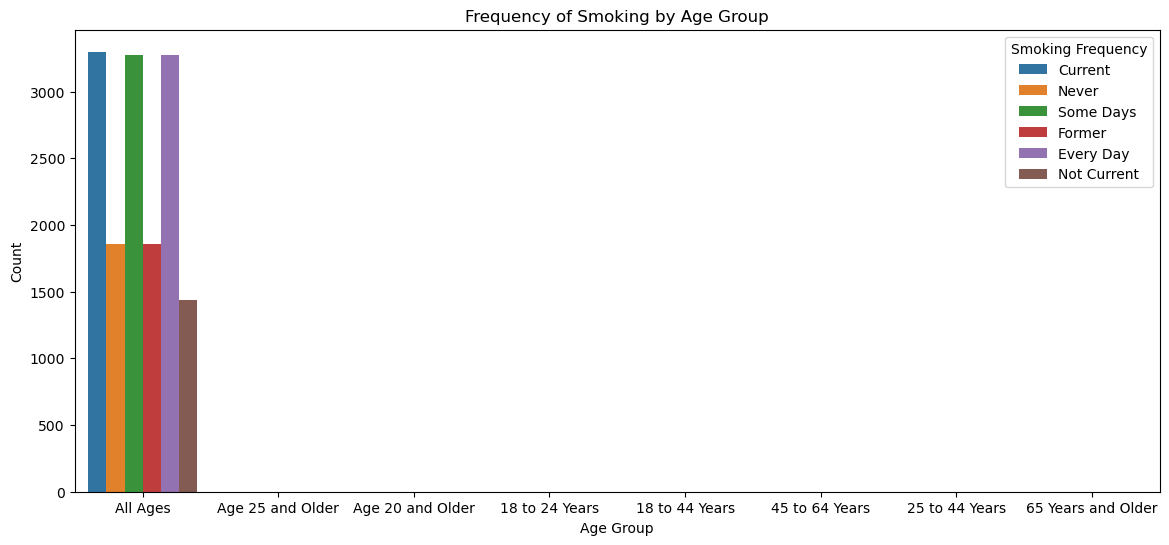

In [12]:
# Frequency of Smoking by Age Group
plt.figure(figsize=(14, 6))
sns.countplot(x='Age', hue='Response', data=tobacco)
plt.title('Frequency of Smoking by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Smoking Frequency', loc='upper right')
plt.show()

#### Frequency of Smoking by Race

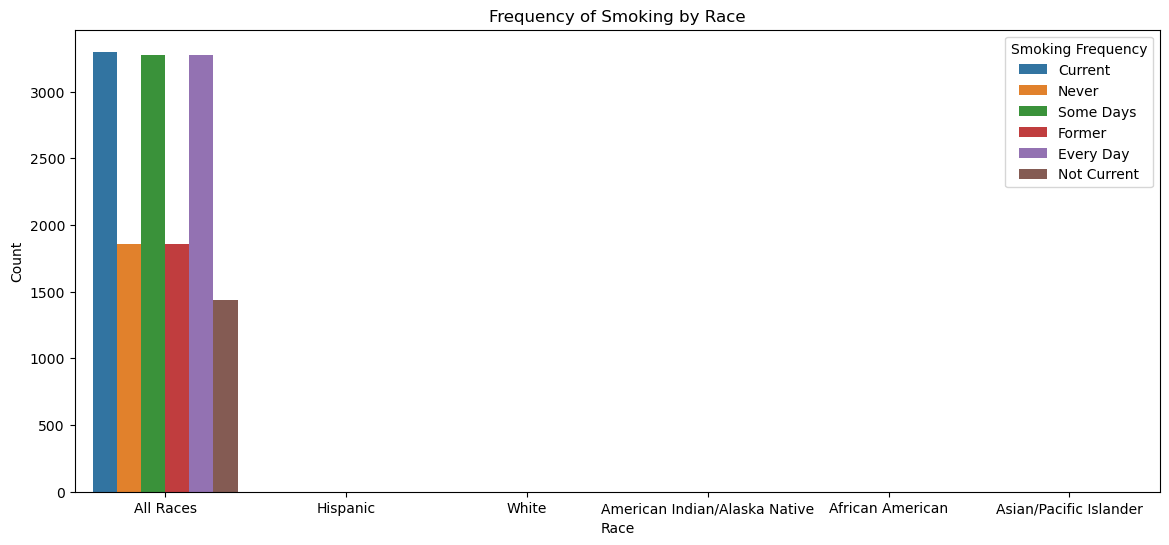

In [13]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Race', hue='Response', data=tobacco)
plt.title('Frequency of Smoking by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Smoking Frequency', loc='upper right')
plt.show()


#### Frequency of Smoking by Education Level

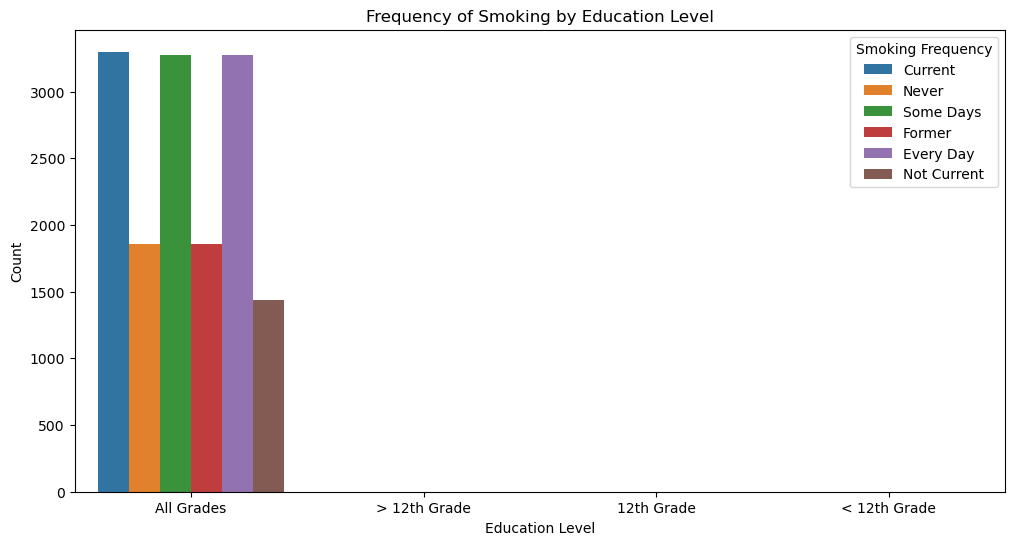

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Education', hue='Response', data=tobacco)
plt.title('Frequency of Smoking by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Smoking Frequency')
plt.show()


#### Frequency of Smoking by Geographic Location

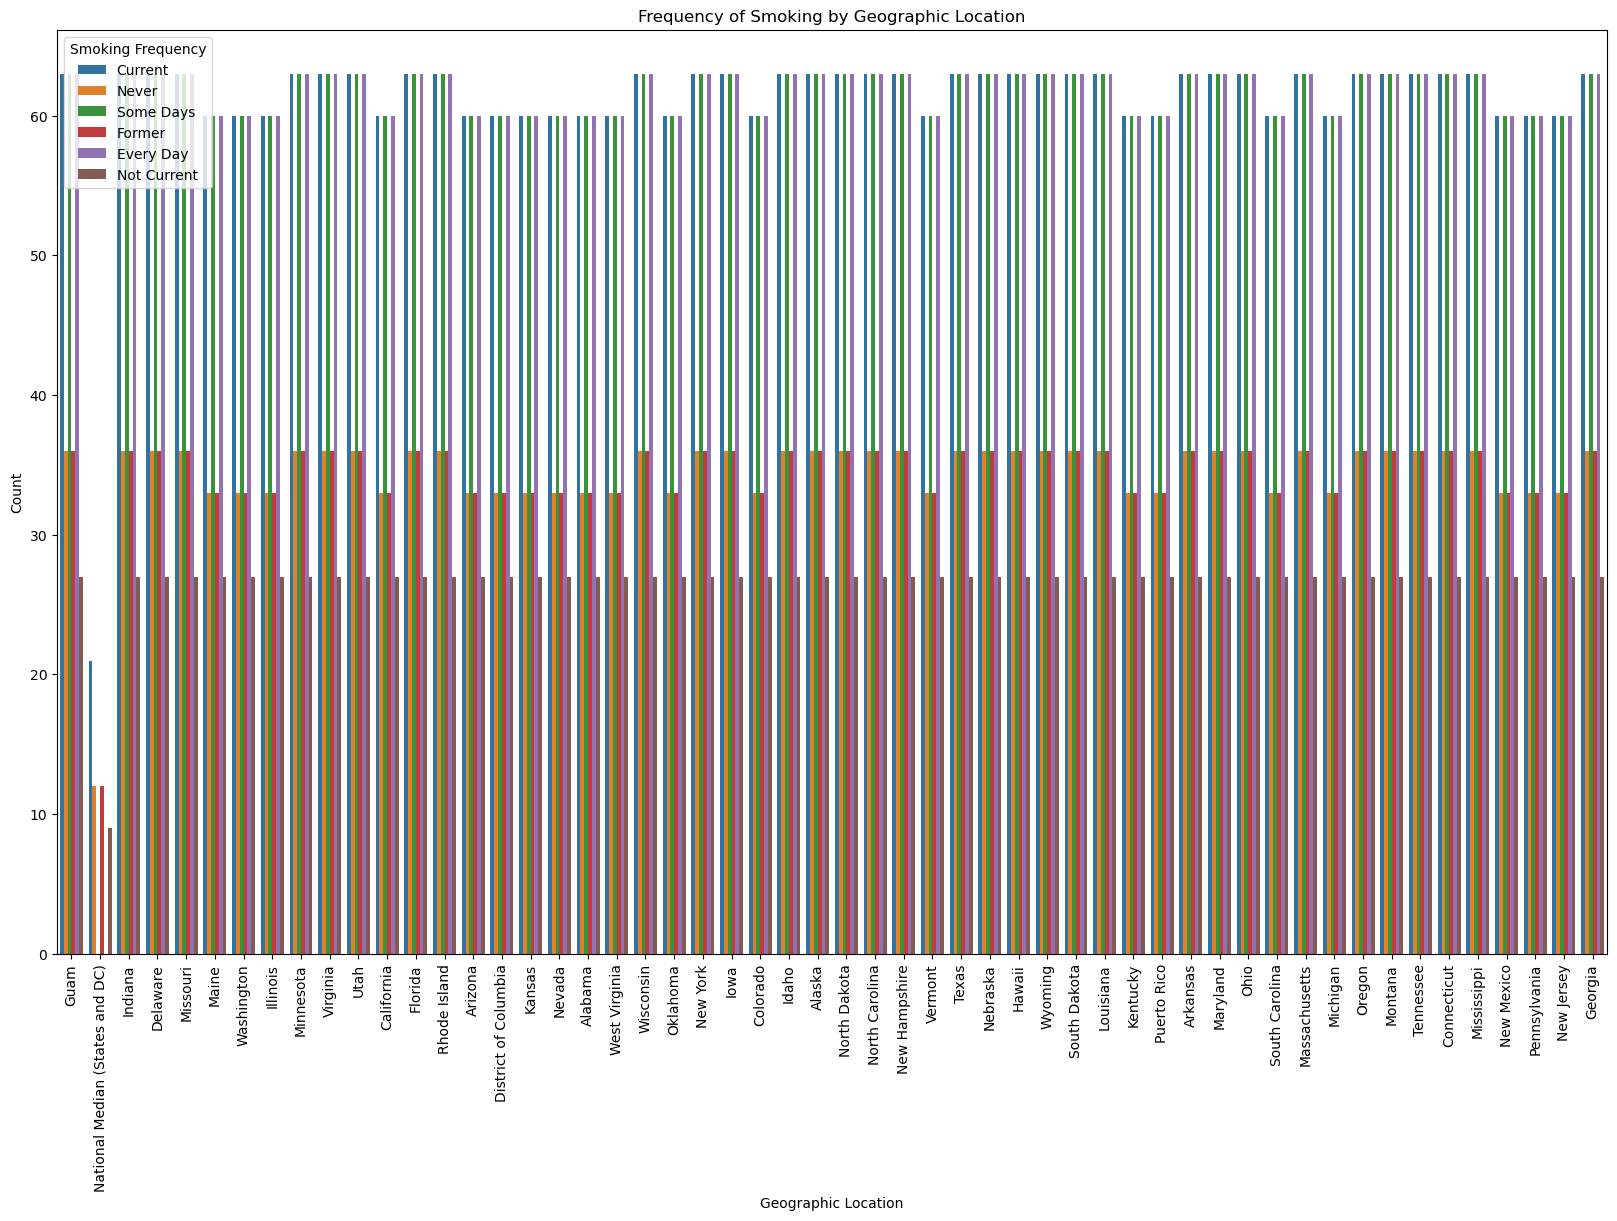

In [15]:
# Frequency of Smoking by Geographic Location
plt.figure(figsize=(20, 12))
sns.countplot(x='LocationDesc', hue='Response', data=tobacco)
plt.title('Frequency of Smoking by Geographic Location')
plt.xlabel('Geographic Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Smoking Frequency')
plt.show()


#### Percentage of Smokers Over the Years

In [16]:
# Extract 'YEAR' and 'Data_Value' columns
data_values_year = tobacco[['YEAR', 'Data_Value']].copy()

# Extract the first four characters from the 'YEAR' column
data_values_year['YEAR'] = data_values_year['YEAR'].str[:4]

# Filter the DataFrame
filtered_df = data_values_year[data_values_year['YEAR'].astype(int).isin(range(2011, 2020))]

# Check if the resulting DataFrame is empty
if filtered_df.empty:
    print("No data available for the specified years.")
else:
    print("Data successfully filtered.")


Data successfully filtered.


C:\Users\RAHUL\AppData\Local\Temp\ipykernel_22660\1008425422.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='YEAR', y='Data_Value', data=filtered_df_sorted, ci=None)


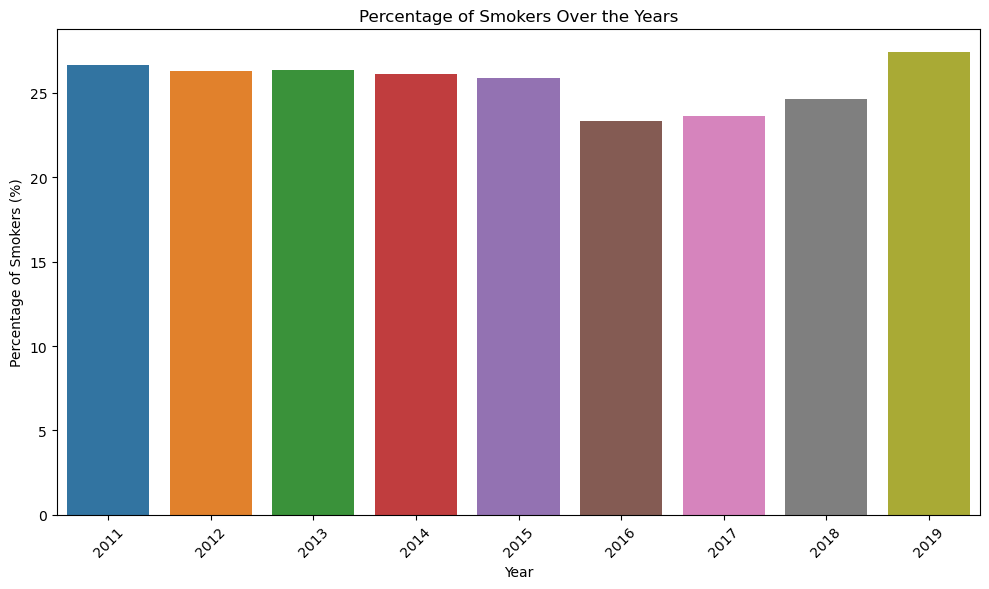

In [17]:
# Sort the DataFrame by the 'YEAR' column
filtered_df_sorted = filtered_df.sort_values('YEAR')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='YEAR', y='Data_Value', data=filtered_df_sorted, ci=None)

# Set the title and labels
plt.title('Percentage of Smokers Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage of Smokers (%)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [18]:
# Group the data by 'YEAR' and calculate the mean of 'Data_Value' for each group
mean_values = filtered_df_sorted.groupby('YEAR')['Data_Value'].mean()

# Print the mean average of each percentage amount
print(mean_values)


YEAR
2011    26.669324
2012    26.308824
2013    26.361350
2014    26.124664
2015    25.905884
2016    23.349819
2017    23.656797
2018    24.649263
2019    27.401737
Name: Data_Value, dtype: float64


#### Frequency of Quit Attempts

In [19]:
# Getting unique values in the 'MeasureDesc' column
unique_measures = tobacco['MeasureDesc'].unique()

# Displaying unique values
print(unique_measures)

['Current Smoking' 'Smoking Status' 'Current Use'
 'Current Use – (2 yrs – Race/Ethnicity)' 'Smoking Frequency'
 'Current Smoking – (2 yrs – Race/Ethnicity)' 'User Status'
 'Frequency of Use' 'Percent of Former Smokers Among Ever Smokers'
 'Quit Attempt in Past Year Among Every Day Cigarette Smokers']


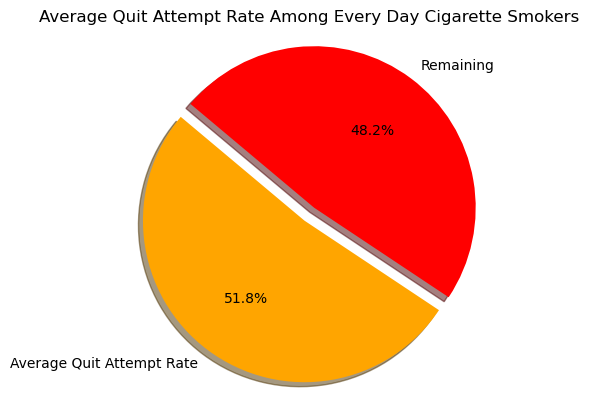

In [20]:
# Filtering the tobacco dataset for the measure 'Quit Attempt in Past Year Among Every Day Cigarette Smokers'
quit_attempt_data = tobacco[tobacco['MeasureDesc'] == 'Quit Attempt in Past Year Among Every Day Cigarette Smokers']

# Calculating the average of the data values
average_value = quit_attempt_data['Data_Value'].mean()

# Creating a pie chart
labels = ['Average Quit Attempt Rate', 'Remaining']
sizes = [average_value, 100 - average_value]  # Calculate the remaining percentage
colors = ['orange', 'red']
explode = (0.1, 0)  # explode the first slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Average Quit Attempt Rate Among Every Day Cigarette Smokers')
plt.show()

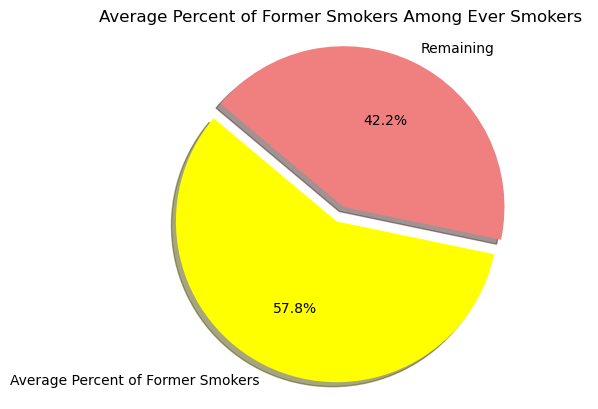

In [21]:
# Filtering the tobacco dataset for the measure 'Percent of Former Smokers Among Ever Smokers'
former_smokers_data = tobacco[tobacco['MeasureDesc'] == 'Percent of Former Smokers Among Ever Smokers']
# Calculating the average of the data values
average_value = former_smokers_data['Data_Value'].mean()
# Creating a pie chart
labels = ['Average Percent of Former Smokers', 'Remaining']
sizes = [average_value, 100 - average_value]  # Calculate the remaining percentage
colors = ['yellow', 'lightcoral']
explode = (0.1, 0)  # explode the first slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Average Percent of Former Smokers Among Ever Smokers')
plt.show()

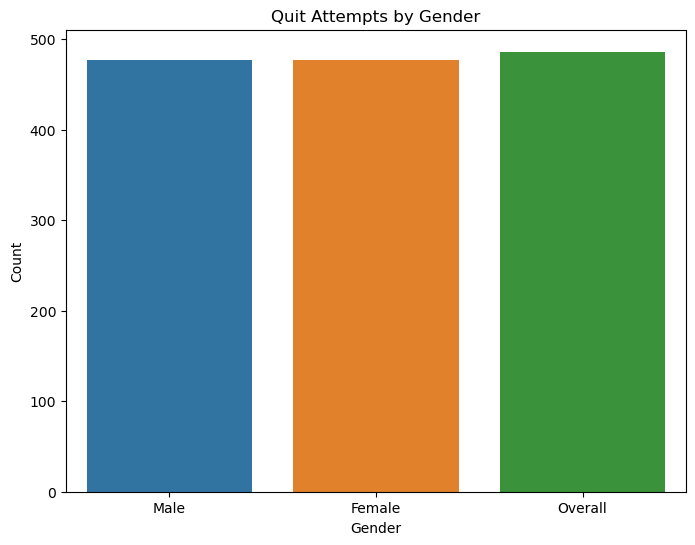

In [22]:
# Bar plot showing quit attempts by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=quit_attempt_data)
plt.title('Quit Attempts by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

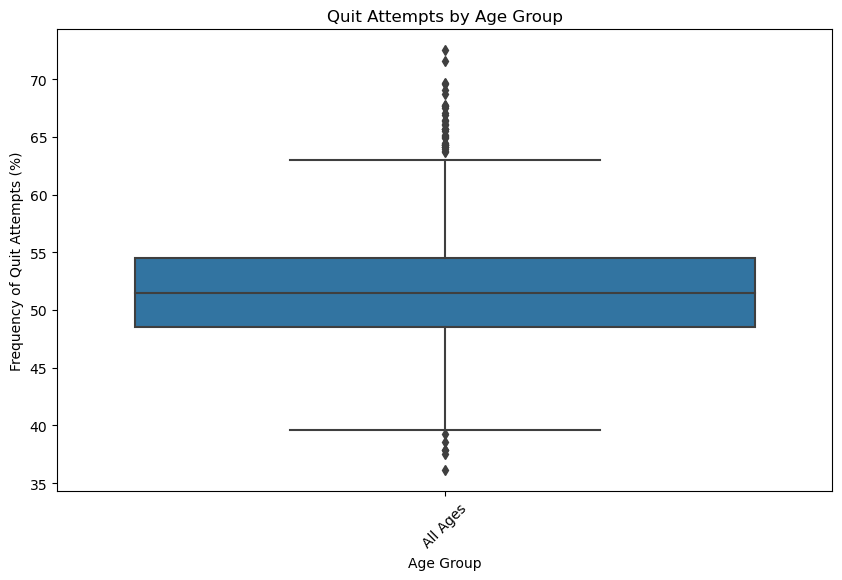

In [23]:
#Box plot of quit attempts by age group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Data_Value', data=quit_attempt_data)
plt.title('Quit Attempts by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency of Quit Attempts (%)')
plt.xticks(rotation=45)
plt.show()

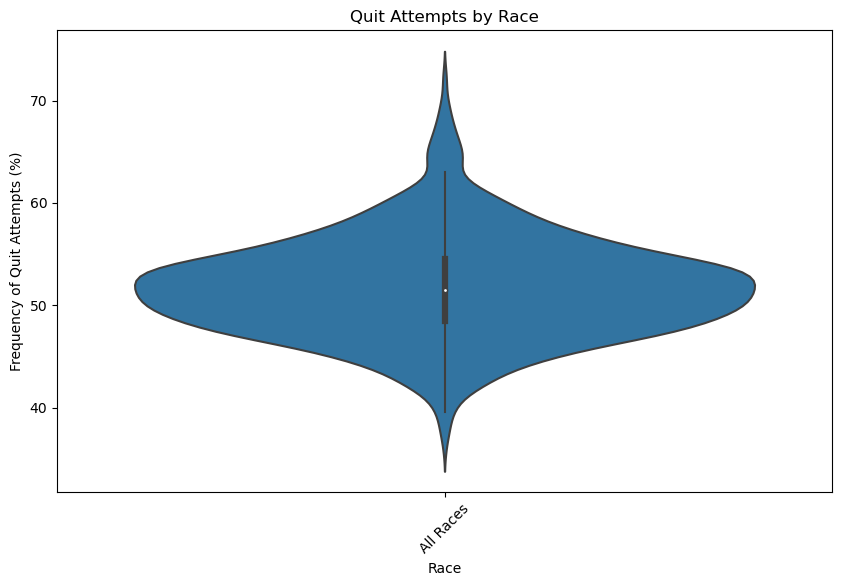

In [24]:
# Violin plot of quit attempts by race
plt.figure(figsize=(10, 6))
sns.violinplot(x='Race', y='Data_Value', data=quit_attempt_data)
plt.title('Quit Attempts by Race')
plt.xlabel('Race')
plt.ylabel('Frequency of Quit Attempts (%)')
plt.xticks(rotation=45)
plt.show()

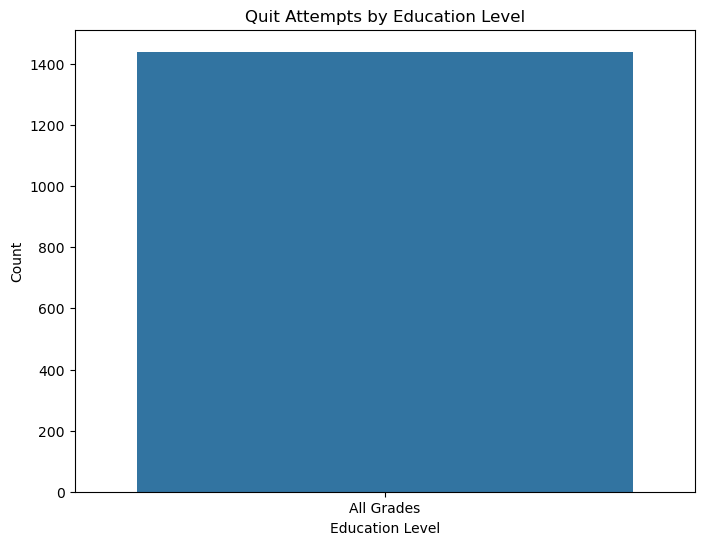

In [25]:
# Bar plot of quit attempts by education level
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', data=quit_attempt_data)
plt.title('Quit Attempts by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

### Data Preparation

In [26]:
# Selecting the specified columns
selected_columns = ['Age', 'Gender', 'Education', 'TopicDesc', 'MeasureDesc']

# Creating a new DataFrame with only the selected columns
selected_data = tobacco[selected_columns]


In [27]:
# Displaying the selected data
selected_data.head()

,Age,Gender,Education,TopicDesc,MeasureDesc
0,All Ages,Male,All Grades,Cigarette Use (Adults),Current Smoking
1,All Ages,Overall,All Grades,Cigarette Use (Adults),Smoking Status
2,All Ages,Overall,All Grades,Cigarette Use (Adults),Smoking Status
3,All Ages,Overall,All Grades,Smokeless Tobacco Use (Adults),Current Use
4,All Ages,Overall,All Grades,Cigarette Use (Adults),Current Smoking


In [28]:
# Checking unique values in each variable
for column in selected_data.columns:
    unique_values = selected_data[column].unique()
    print(f"Unique values in {column}: {unique_values}")


Unique values in Age: ['All Ages' 'Age 25 and Older' 'Age 20 and Older' '18 to 24 Years'
 '18 to 44 Years' '45 to 64 Years' '25 to 44 Years' '65 Years and Older']
Unique values in Gender: ['Male' 'Overall' 'Female']
Unique values in Education: ['All Grades' '> 12th Grade' '12th Grade' '< 12th Grade']
Unique values in TopicDesc: ['Cigarette Use (Adults)' 'Smokeless Tobacco Use (Adults)'
 'E-Cigarette Use (Adults)' 'Cessation (Adults)']
Unique values in MeasureDesc: ['Current Smoking' 'Smoking Status' 'Current Use'
 'Current Use – (2 yrs – Race/Ethnicity)' 'Smoking Frequency'
 'Current Smoking – (2 yrs – Race/Ethnicity)' 'User Status'
 'Frequency of Use' 'Percent of Former Smokers Among Ever Smokers'
 'Quit Attempt in Past Year Among Every Day Cigarette Smokers']


In [29]:
selected_data = tobacco[selected_columns].copy()

In [30]:
# Replace values in 'MeasureDesc' column
selected_data['Smokers'] = 0  # Initialize 'Smokers' column with 0
selected_data['Not Smokers'] = 0  # Initialize 'Not Smokers' column with 0

# Replace values for 'Smokers' column
selected_data.loc[selected_data['MeasureDesc'].isin(['Current Smoking', 'Current Use – (2 yrs – Race/Ethnicity)', 'Current Smoking – (2 yrs – Race/Ethnicity)', 'Current Use']), 'Smokers'] = 1

# Replace values for 'Not Smokers' column
selected_data.loc[selected_data['MeasureDesc'].isin(['Percent of Former Smokers Among Ever Smokers', 'Quit Attempt in Past Year Among Every Day Cigarette Smokers']), 'Not Smokers'] = 1

# Combine 'Smokers' and 'Not Smokers' columns to create 'Smoking_Status' column
selected_data['Smoking_Status'] = selected_data['Smokers'] | selected_data['Not Smokers']

# Drop the intermediate columns 'Smokers' and 'Not Smokers'
selected_data.drop(['Smokers', 'Not Smokers'], axis=1, inplace=True)

# Display the updated DataFrame
selected_data.head()

,Age,Gender,Education,TopicDesc,MeasureDesc,Smoking_Status
0,All Ages,Male,All Grades,Cigarette Use (Adults),Current Smoking,1
1,All Ages,Overall,All Grades,Cigarette Use (Adults),Smoking Status,0
2,All Ages,Overall,All Grades,Cigarette Use (Adults),Smoking Status,0
3,All Ages,Overall,All Grades,Smokeless Tobacco Use (Adults),Current Use,1
4,All Ages,Overall,All Grades,Cigarette Use (Adults),Current Smoking,1


In [31]:
selected_data1 = selected_data

In [32]:
# Defining a function to map TopicDesc values to Type of Cigarette
def map_cigarette_type(topic):
    if topic == 'Cigarette Use (Adults)':
        return 0
    elif topic == 'Smokeless Tobacco Use (Adults)':
        return 1
    elif topic == 'E-Cigarette Use (Adults)':
        return 2
    else:
        return None

In [33]:
# Applying the function to create 'Type of Cigarette' column
selected_data1['Type of Cigarette'] = selected_data1['TopicDesc'].apply(map_cigarette_type)

# Creating 'Smoking_Ceased' column and set values to 1 where TopicDesc is 'Cessation (Adults)'
selected_data1['Smoking_Ceased'] = 0
selected_data1.loc[selected_data1['TopicDesc'] == 'Cessation (Adults)', 'Smoking_Ceased'] = 1

In [34]:
# Converting 'Type of Cigarette' column to dummy variables
selected_data1 = pd.get_dummies(selected_data1, columns=['Type of Cigarette'])

In [35]:
# Displaying the updated DataFrame
selected_data1.head()

,Age,Gender,Education,TopicDesc,MeasureDesc,Smoking_Status,Smoking_Ceased,Type of Cigarette_0.0,Type of Cigarette_1.0,Type of Cigarette_2.0
0,All Ages,Male,All Grades,Cigarette Use (Adults),Current Smoking,1,0,1,0,0
1,All Ages,Overall,All Grades,Cigarette Use (Adults),Smoking Status,0,0,1,0,0
2,All Ages,Overall,All Grades,Cigarette Use (Adults),Smoking Status,0,0,1,0,0
3,All Ages,Overall,All Grades,Smokeless Tobacco Use (Adults),Current Use,1,0,0,1,0
4,All Ages,Overall,All Grades,Cigarette Use (Adults),Current Smoking,1,0,1,0,0


In [36]:
# Removing Overall from Gender
# Filter out rows where 'Gender' is not equal to 'Overall'
selected_data2 = selected_data1[selected_data1['Gender'] != 'Overall']

In [37]:
# Maintaining only All Ages in Age
selected_data3 = selected_data2[selected_data2['Age'] == 'All Ages']

# Displaying the filtered DataFrame
selected_data3.head()

,Age,Gender,Education,TopicDesc,MeasureDesc,Smoking_Status,Smoking_Ceased,Type of Cigarette_0.0,Type of Cigarette_1.0,Type of Cigarette_2.0
0,All Ages,Male,All Grades,Cigarette Use (Adults),Current Smoking,1,0,1,0,0
5,All Ages,Female,All Grades,Cigarette Use (Adults),Current Smoking,1,0,1,0,0
8,All Ages,Female,All Grades,Cigarette Use (Adults),Smoking Frequency,0,0,1,0,0
9,All Ages,Male,All Grades,Cigarette Use (Adults),Smoking Status,0,0,1,0,0
12,All Ages,Male,All Grades,Cigarette Use (Adults),Smoking Frequency,0,0,1,0,0


In [38]:
# Maintaining only All Grades All in Education 
selected_data4 = selected_data3[selected_data3['Education'] == 'All Grades']

In [39]:
# Droping the 'TopicDesc' and 'MeasureDesc' columns
selected_data4 = selected_data4.drop(['TopicDesc', 'MeasureDesc'], axis=1)
selected_data4.head()

,Age,Gender,Education,Smoking_Status,Smoking_Ceased,Type of Cigarette_0.0,Type of Cigarette_1.0,Type of Cigarette_2.0
0,All Ages,Male,All Grades,1,0,1,0,0
5,All Ages,Female,All Grades,1,0,1,0,0
8,All Ages,Female,All Grades,0,0,1,0,0
9,All Ages,Male,All Grades,0,0,1,0,0
12,All Ages,Male,All Grades,0,0,1,0,0


In [40]:
# Converting 'Gender' to dummy variables
gender_dummies = pd.get_dummies(selected_data4['Gender'], prefix='Gender', drop_first=True)

# Converting 'Age' to dummy variables
age_dummies = pd.get_dummies(selected_data4['Age'], prefix='Age', drop_first=False)

# Converting 'Education' to dummy variables
education_dummies = pd.get_dummies(selected_data4['Education'], prefix='Education', drop_first=True)

# Concatenating the dummy variables with the original DataFrame
selected_data4_with_dummies = pd.concat([selected_data4, gender_dummies, age_dummies, education_dummies], axis=1)

# Dropping the original categorical columns
selected_data4_with_dummies.drop(['Gender', 'Age', 'Education'], axis=1, inplace=True)


In [41]:
# Displaying the DataFrame with dummy variables
selected_data4_with_dummies.head()

,Smoking_Status,Smoking_Ceased,Type of Cigarette_0.0,Type of Cigarette_1.0,Type of Cigarette_2.0,Gender_Male,Age_All Ages
0,1,0,1,0,0,1,1
5,1,0,1,0,0,0,1
8,0,0,1,0,0,0,1
9,0,0,1,0,0,1,1
12,0,0,1,0,0,1,1


In [42]:
# Dropping the 'Smoking_Ceased' column
selected_data4_with_dummies.drop('Smoking_Ceased', axis=1, inplace=True)

# Displaying the DataFrame after dropping the column
selected_data4_with_dummies.head()

,Smoking_Status,Type of Cigarette_0.0,Type of Cigarette_1.0,Type of Cigarette_2.0,Gender_Male,Age_All Ages
0,1,1,0,0,1,1
5,1,1,0,0,0,1
8,0,1,0,0,0,1
9,0,1,0,0,1,1
12,0,1,0,0,1,1


In [43]:
selected_data4_with_dummies.columns

Index(['Smoking_Status', 'Type of Cigarette_0.0', 'Type of Cigarette_1.0',
       'Type of Cigarette_2.0', 'Gender_Male', 'Age_All Ages'],
      dtype='object')

### Model

#### Logistics Regression

In [44]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

In [45]:
# Defining features and target variable
X = selected_data4_with_dummies[['Type of Cigarette_0.0', 'Type of Cigarette_1.0', 'Type of Cigarette_2.0', 'Gender_Male', 'Age_All Ages']]
y = selected_data4_with_dummies['Smoking_Status']

In [46]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Initializing logistic regression model
logistic_model = LogisticRegression()

In [48]:
# Fitting the model on the training data
logistic_model.fit(X_train, y_train)

LogisticRegression()

##### ROC and cross validation

In [49]:
# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean ROC-AUC Score:", cv_scores.mean())


NameError: name 'model' is not defined

In [ ]:
# Predicting on the testing data
y_pred = model.predict(X_test)


In [ ]:
# Evaluating the model
print ('Logistic Regression: \n')
print(classification_report(y_test, y_pred))

#### Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
# Defining features (X) and target (y)
X = selected_data4_with_dummies.drop(columns=['Smoking_Status'])
y = selected_data4_with_dummies['Smoking_Status']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initializing the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier on the training data
rf_classifier.fit(X_train, y_train)

In [ ]:
# Performing cross-validation with 5 folds
cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='roc_auc')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean ROC-AUC Score:", cv_scores.mean())

In [ ]:
# Making predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluating the performance of the classifier
print ('Random Forest Classifier:\n')
print(classification_report(y_test, y_pred))

#### Using Support Vector Machine and Gradient Boosting Algorithms

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
# Training Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

In [ ]:
# Training Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

In [ ]:
# Making predictions on the test set
svm_probs = svm_model.predict_proba(X_test)[:, 1]
gb_probs = gb_model.predict_proba(X_test)[:, 1]

In [149]:
# Calculating ROC-AUC score for each model
svm_roc_auc = roc_auc_score(y_test, svm_probs)
gb_roc_auc = roc_auc_score(y_test, gb_probs)

print("SVM ROC-AUC Score:", svm_roc_auc)
print("Gradient Boosting ROC-AUC Score:", gb_roc_auc)

SVM ROC-AUC Score: 0.7335403726708074
Gradient Boosting ROC-AUC Score: 0.7448382898076668


## The End